In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import svm

%matplotlib inline

## Multivariate Gaussian Distribution

We have 4 classes generated by a Gaussian process, we try to classify it based on different classifiers

In [24]:
x1 = np.random.multivariate_normal([0,0], [[0.5,0],[0,2]], 1000)
x2 = np.random.multivariate_normal([10,4], [[3,0],[0,0.5]], 1000)
x3 = np.random.multivariate_normal([2.5,2.5], [[1,0],[0,1]], 00)
x4 = np.random.multivariate_normal([2.5,-2.5], [[0.1,0],[0,1]], 00)

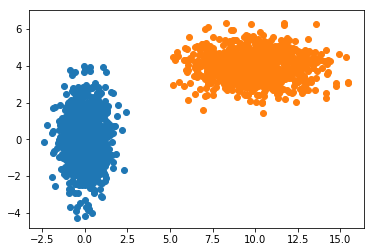

In [25]:
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1])
plt.scatter(x3[:,0], x3[:,1])
plt.scatter(x4[:,0], x4[:,1])
plt.show()

In [26]:
x = np.vstack((x1, x2, x3, x4))
y = np.array([1]*x1.shape[0]+[2]*x2.shape[0]+[3]*x3.shape[0]+[4]*x4.shape[0])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

### Decision Boundary Function

In [21]:
def decision_boundry(x,y, clf):
    '''
    (Your 2D X points), (Your 2D points actual y labels), (classifier)
    '''
    # create a mesh to plot in
    h = 0.02
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
    plt.axis('tight')



    for lbl in np.unique(y):
        temp_x = x[y == lbl]
        plt.scatter(temp_x[:,0], temp_x[:,1], cmap=plt.cm.coolwarm, s=20, edgecolors='k', label = "Class"+str(lbl))
    plt.legend()
    plt.show()

### Using Naive Bayes Classifier

In [27]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print('Accuracy of model : {}'.format((y_pred == y_test).sum()/y_test.shape[0]))

Accuracy of model : 1.0


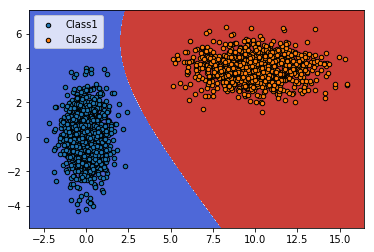

In [28]:
decision_boundry(x, y, gnb)

### Using SVM classifier

In [29]:
svm_clf = svm.SVC(kernel='linear', C=100)
y_pred = svm_clf.fit(x_train, y_train).predict(x_test)
print('Accuracy of model : {}'.format((y_pred == y_test).sum()/y_test.shape[0]))

Accuracy of model : 1.0


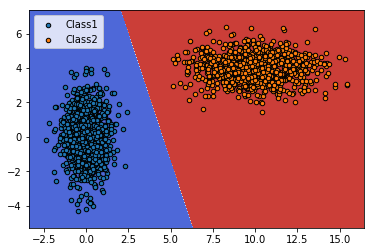

In [30]:
decision_boundry(x, y, svm_clf)

## Gaussian Mixture Model

We have 2 classes generated from 2 hidden multivariate gaussian models, we again try to fit NB and SVM

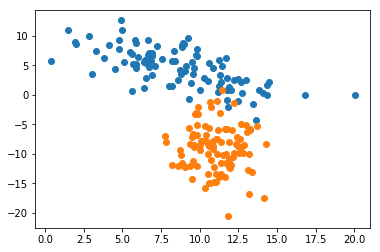

In [10]:
xg1 = 3*x1+x2+4
xg2 = 0.4*x3+4*x4

plt.scatter(xg1[:,0], xg1[:,1])
plt.scatter(xg2[:,0], xg2[:,1])
plt.show()

### NB classifier

In [11]:
xg = np.vstack((xg1, xg2))
yg = np.array([1]*xg1.shape[0]+[2]*xg2.shape[0])

xg1_train, xg1_test, yg1_train, yg2_test = train_test_split(xg,yg, test_size = 0.3)

Accuracy of model : 1.0


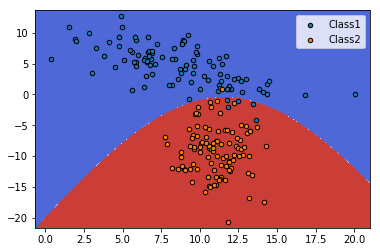

In [12]:
gnb = GaussianNB()
y_pred = gnb.fit(xg1_train, yg1_train).predict(xg1_test)
print('Accuracy of model : {}'.format((y_pred == yg2_test).sum()/yg2_test.shape[0]))

decision_boundry(xg, yg, gnb)

### SVM classifier`

Accuracy of model : 0.95


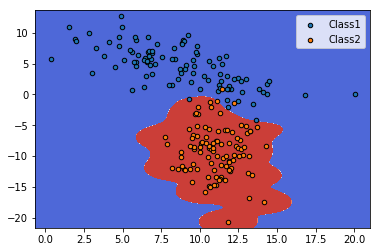

In [16]:
svm_clf = svm.SVC(kernel='rbf', C=1)
y_pred = svm_clf.fit(xg1_train, yg1_train).predict(xg1_test)
print('Accuracy of model : {}'.format((y_pred == yg2_test).sum()/yg2_test.shape[0]))

decision_boundry(xg, yg, svm_clf)